# Zomato Data Analysis

#### A dataset of Zomato has been provided, named "Zomato_data.csv". Analyze the data and primarily find out the answers of the following questions:

Q1. What type of restaurant do the majority of customers order from?<br>
Q2. How many votes has each type of restaurant received from customers?<br>
Q3. What are the ratings that the majority of restaurants have received?<br>
Q4. Zomato has observed that most couples order most of their foods online. What is their average spending on each other?<br>
Q5. Which mode (online or offline) has received the maximum rating?<br>
Q6. Which type of restaurant received more offline orders, so that Zomato can prefer customers with some good offers?

#### You can more simplify and analyze the data as required, to find out the answers of more different questions that are not mentioned above.

#### Later create an AI/ML/DL model of your choice and features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Zomato_data.csv") # Reading the CSV file and storing it as a DataFrame variable "df"

### Let's look into the data carefully

In [3]:
df.head(10) # Looking at the top 10 datas of the dataset, just to have initial and basic idea about the contents of the dataset

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


Getting a detailed information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


From the above given information, it is quite evident that it doesn't include any NaN (Null) values

In [5]:
# Just to make sure the absence of NaN values
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

Let's check if any duplicate data is present in the dataset or not

In [6]:
df.duplicated().sum()

np.int64(0)

Since, there are neither any duplicate data or NaN data, let's check the final shape of the dataset.

In [7]:
df.shape

(148, 7)

Therefore, there are total 148 values in the dataset, with 7 columns

## Data Cleaning (For Data Analysis)

#### Changing the "rate" to float and removing the denominator.

In [8]:
df["rate"] = df["rate"].str.split("/").str[0]

In [9]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [10]:
df["rate"] = df["rate"].astype(float)

#### It can be seen that some of the restaurants have 0 votes but still have some rating. 

We need those values to be deleted, since they are not desired for data analysis

In [11]:
df[df["votes"] == 0]

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
72,Spicy Tandoor,No,No,4.1,0,150,Dining
75,Om Sri Vinayaka Chats,No,No,3.6,0,500,Dining
84,Chill Out,No,No,3.8,0,100,Dining
90,Me And My Cake,No,No,3.7,0,500,Dining
91,Sunsadm,No,No,3.7,0,400,Dining
92,Annapooraneshwari Mess,No,No,3.7,0,200,Dining
107,Coffee Shopee,No,No,3.4,0,250,Dining
110,Hari Super Sandwich,No,No,3.2,0,200,Dining
113,Dharwad Line Bazaar Mishra Pedha,No,No,3.4,0,150,Dining
114,Cake Bite,No,No,3.4,0,300,Dining


In [12]:
df.drop(df[df["votes"] == 0].index, inplace=True)

In [13]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
124,Kwality Wall's Swirl's Happiness Station,No,No,2.9,25,200,Dining
127,Ruchi Maayaka,No,No,3.3,8,100,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


#### Bayesian Average

The core idea of Bayesian Average is that you "pull" the rating of items with few reviews toward the average rating of all products. This adds "imaginary" or "ghost" reviews that represent the average, which stabilizes the score.

The formula for Bayesian Average is:<br>
$$
\text{Adjusted Rating} = \frac{(v \times R) + (m \times C)}{v + m}
$$

**What the Variables Mean**
- R = The item's average rating (e.g., 4.6)
- v = The number of votes (reviews) for that specific item (e.g., 5,000)
- m = The "minimum" number of votes required for confidence. This is the "magic number" you choose. A good starting point is to use the average number of reviews across all products you're comparing. Let's use 100 as an example.
- C = The mean rating across all products (e.g., the average rating of all items on the site, which is often around 3.5 stars)

In [14]:
# The variables that can be defined before hand
m = df["votes"].mean().round(0)
C = df["rate"].mean().round(1)

print(f"m = {m} and C = {C}")

m = 341.0 and C = 3.7


In [15]:
df["bayesian_average"] = round(((df["votes"] * df["rate"]) + (m * C)) / (df["votes"] + m), 1)

In [16]:
df[df["votes"] <= 341]

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),bayesian_average
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet,3.7
4,Grand Village,No,No,3.8,166,600,Buffet,3.7
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet,3.7
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,800,Buffet,3.7
8,Penthouse Cafe,Yes,No,4.0,324,700,other,3.8
...,...,...,...,...,...,...,...,...
123,Parjanya Chat Zone,No,No,3.3,17,200,Dining,3.7
124,Kwality Wall's Swirl's Happiness Station,No,No,2.9,25,200,Dining,3.6
127,Ruchi Maayaka,No,No,3.3,8,100,Dining,3.7
146,Darbar,No,No,3.0,98,800,Dining,3.5


The detailed, statistical overview of the dataset

In [17]:
df.describe()

,rate,votes,approx_cost(for two people),bayesian_average
count,115.000000,115.000000,115.000000,115.000000
mean,3.710435,340.800000,469.565217,3.760870
std,0.394563,724.471885,220.415840,0.185763
min,2.600000,4.000000,100.000000,3.200000
25%,3.500000,28.000000,300.000000,3.700000
50%,3.800000,88.000000,450.000000,3.700000
75%,4.000000,311.500000,600.000000,3.800000
max,4.600000,4884.000000,950.000000,4.500000


### Therefore, the final dataset for Data Analysis

In [18]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),bayesian_average
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,4.0
1,Spice Elephant,Yes,No,4.1,787,800,Buffet,4.0
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet,3.8
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet,3.7
4,Grand Village,No,No,3.8,166,600,Buffet,3.7
...,...,...,...,...,...,...,...,...
124,Kwality Wall's Swirl's Happiness Station,No,No,2.9,25,200,Dining,3.6
127,Ruchi Maayaka,No,No,3.3,8,100,Dining,3.7
145,Anna Kuteera,Yes,No,4.0,771,450,Dining,3.9
146,Darbar,No,No,3.0,98,800,Dining,3.5


## Data Cleaning (For ML Model Training)

In [19]:
df2 = df.copy()

In [20]:
df2

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),bayesian_average
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,4.0
1,Spice Elephant,Yes,No,4.1,787,800,Buffet,4.0
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet,3.8
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet,3.7
4,Grand Village,No,No,3.8,166,600,Buffet,3.7
...,...,...,...,...,...,...,...,...
124,Kwality Wall's Swirl's Happiness Station,No,No,2.9,25,200,Dining,3.6
127,Ruchi Maayaka,No,No,3.3,8,100,Dining,3.7
145,Anna Kuteera,Yes,No,4.0,771,450,Dining,3.9
146,Darbar,No,No,3.0,98,800,Dining,3.5


#### Changing the "Yes"s and "No"s of "online_order" and "book_table" columns into 1s and 0s respectively.

Let's first check the unique values of "online_order" and "book_table" columns

In [21]:
df2["online_order"].unique()

array(['Yes', 'No'], dtype=object)

In [22]:
df2["book_table"].unique()

array(['Yes', 'No'], dtype=object)

Since, only two types of labels are available, i.e. "Yes" and "No", we'll be using Label Encoder, a powerful tool from Scikit Learn. 

In [23]:
label_encoding = LabelEncoder()

df2["online_order"] = label_encoding.fit_transform(df2["online_order"])
df2["book_table"] = label_encoding.fit_transform(df2["book_table"])

#### Also we need to change "listed_in(type)" column using Label Encoder into 0s, 1s, 2s and 3s

In [24]:
df2["listed_in(type)"] = label_encoding.fit_transform(df2["listed_in(type)"])

In [25]:
df2

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),bayesian_average
0,Jalsa,1,1,4.1,775,800,0,4.0
1,Spice Elephant,1,0,4.1,787,800,0,4.0
2,San Churro Cafe,1,0,3.8,918,800,0,3.8
3,Addhuri Udupi Bhojana,0,0,3.7,88,300,0,3.7
4,Grand Village,0,0,3.8,166,600,0,3.7
...,...,...,...,...,...,...,...,...
124,Kwality Wall's Swirl's Happiness Station,0,0,2.9,25,200,2,3.6
127,Ruchi Maayaka,0,0,3.3,8,100,2,3.7
145,Anna Kuteera,1,0,4.0,771,450,2,3.9
146,Darbar,0,0,3.0,98,800,2,3.5


#### The "name" and "rate" columns are not required in the ML Model

We need to remove the whole "name" column because it is not required

In [26]:
df2.drop("name", axis=1, inplace=True)

Also, the "rate" column would lead to "Target Leaking" and wouldn't give any useful insights

In [27]:
df2.drop("rate", axis=1, inplace=True)

In [28]:
df2

,online_order,book_table,votes,approx_cost(for two people),listed_in(type),bayesian_average
0,1,1,775,800,0,4.0
1,1,0,787,800,0,4.0
2,1,0,918,800,0,3.8
3,0,0,88,300,0,3.7
4,0,0,166,600,0,3.7
...,...,...,...,...,...,...
124,0,0,25,200,2,3.6
127,0,0,8,100,2,3.7
145,1,0,771,450,2,3.9
146,0,0,98,800,2,3.5


The detailed, statistical overview of the dataset

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 0 to 147
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 115 non-null    int64  
 1   book_table                   115 non-null    int64  
 2   votes                        115 non-null    int64  
 3   approx_cost(for two people)  115 non-null    int64  
 4   listed_in(type)              115 non-null    int64  
 5   bayesian_average             115 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 6.3 KB


In [30]:
df2.describe()

,online_order,book_table,votes,approx_cost(for two people),listed_in(type),bayesian_average
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,0.504348,0.069565,340.800000,469.565217,1.747826,3.760870
std,0.502169,0.255526,724.471885,220.415840,0.673346,0.185763
min,0.000000,0.000000,4.000000,100.000000,0.000000,3.200000
25%,0.000000,0.000000,28.000000,300.000000,1.000000,3.700000
50%,1.000000,0.000000,88.000000,450.000000,2.000000,3.700000
75%,1.000000,0.000000,311.500000,600.000000,2.000000,3.800000
max,1.000000,1.000000,4884.000000,950.000000,3.000000,4.500000


### Therefore, the final dataset for Data Analysis

In [31]:
df2

,online_order,book_table,votes,approx_cost(for two people),listed_in(type),bayesian_average
0,1,1,775,800,0,4.0
1,1,0,787,800,0,4.0
2,1,0,918,800,0,3.8
3,0,0,88,300,0,3.7
4,0,0,166,600,0,3.7
...,...,...,...,...,...,...
124,0,0,25,200,2,3.6
127,0,0,8,100,2,3.7
145,1,0,771,450,2,3.9
146,0,0,98,800,2,3.5


## Data Analysis

Let's have a look on the types of restaurants that are available on Zomato

In [32]:
df["listed_in(type)"].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

In [33]:
df["listed_in(type)"].value_counts(sort=False)

listed_in(type)
Buffet     7
Cafes     23
other      8
Dining    77
Name: count, dtype: int64

It is evident that there are 4 types of restaurants: Dining (77 restaurants), Cafes (23 restaurants), Buffet (7 Restaurants) and Others (8 restaurants)

### Q1. What type of restaurant do the majority of customers order from?

In [34]:
print(f"There are total {df['votes'].sum()} orders from various restaurants in Zomato.")

There are total 39192 orders from various restaurants in Zomato.


In [35]:
grouped_votes = df.groupby("listed_in(type)")["votes"].sum()
grouped_votes

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

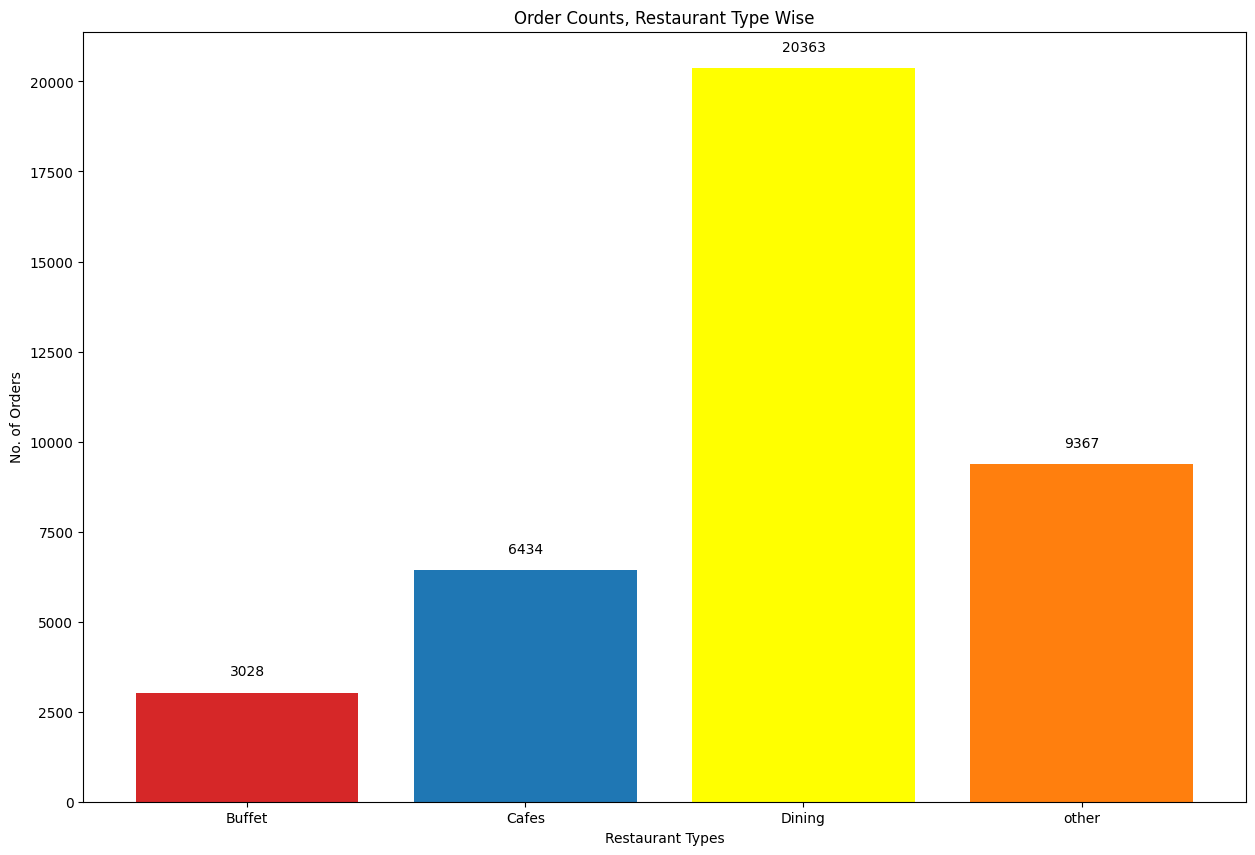

In [36]:
fig, ax = plt.subplots(figsize=(15, 10))

res_types = pd.Series(sorted(df["listed_in(type)"].unique()))
res_order_count = pd.Series(df.groupby("listed_in(type)")["votes"].sum())

bar_colors = ['tab:red', 'tab:blue', 'yellow', 'tab:orange']

bars = ax.bar(res_types, res_order_count, color=bar_colors)
ax.bar_label(bars, labels=res_order_count, padding=10)

plt.title("Order Counts, Restaurant Type Wise")
plt.ylabel("No. of Orders")
plt.xlabel("Restaurant Types")
plt.show()

#### Answer 1:
People mostly order their food from "Dining" type of restaurants. According to the dataset, total 20363 out of 39192 orders were from "Dining" type of restaurants.

### Q2. How many votes has each type of restaurant received from customers?

In [37]:
for i, j in grouped_votes.items():
    print(f"{i} received {j} votes from the customers.")

Buffet received 3028 votes from the customers.
Cafes received 6434 votes from the customers.
Dining received 20363 votes from the customers.
other received 9367 votes from the customers.


C:\Users\Kumaresh Basu\AppData\Local\Temp\ipykernel_5688\2849058995.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (res_types[i], res_order_count[i]), textcoords="offset points", xytext=(0,10), ha='center')


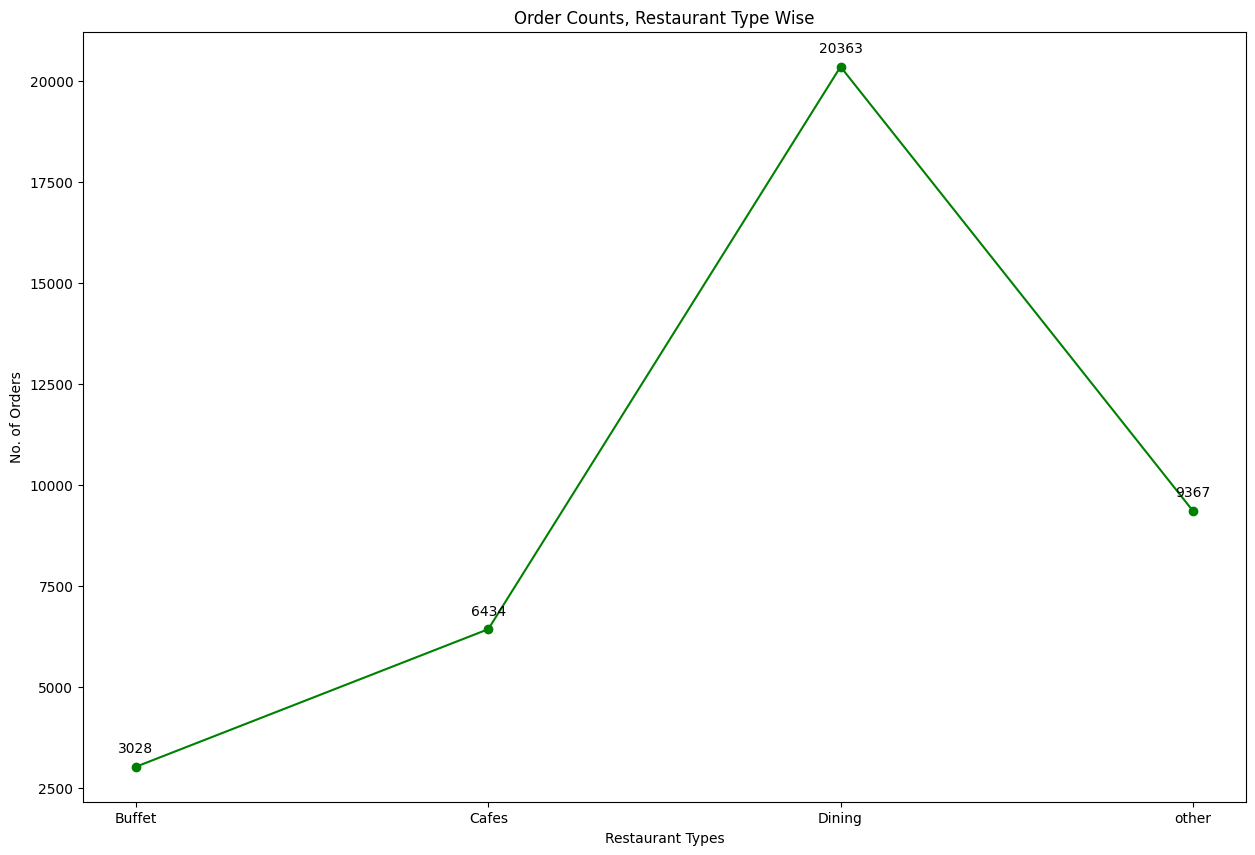

In [38]:
fig, ax = plt.subplots(figsize=(15, 10))

plt.plot(res_types, res_order_count, color="green", marker="o")

for i, txt in enumerate(res_order_count):
    plt.annotate(txt, (res_types[i], res_order_count[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title("Order Counts, Restaurant Type Wise")
plt.xlabel("Restaurant Types")
plt.ylabel("No. of Orders")
plt.show()

#### Answer 2:
Buffet received 3028 votes from the customers.<br>
Cafes received 6434 votes from the customers.<br>
Dining received 20363 votes from the customers.<br>
other received 9367 votes from the customers.

### Q3. What are the ratings that the majority of restaurants have received?

In [39]:
df["rate"].value_counts()

rate
3.8    19
3.7    12
3.6    10
3.9    10
4.0    10
4.1     9
4.2     8
3.2     6
3.3     6
3.5     6
3.1     5
3.0     2
4.6     2
4.4     2
2.8     2
3.4     2
2.9     2
4.3     1
2.6     1
Name: count, dtype: int64

In [40]:
print(f"A maximum of {df['rate'].value_counts().max()} restaurants have got {df['rate'].value_counts().idxmax()}/5 ratings")

A maximum of 19 restaurants have got 3.8/5 ratings


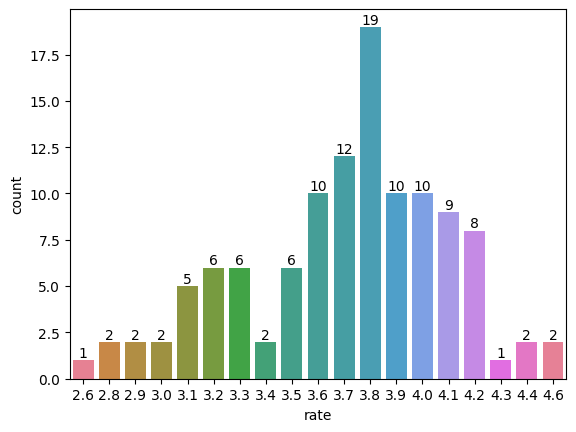

In [41]:
ax = sns.countplot(x=df["rate"], palette="husl", hue=df["rate"], legend=False)

for container in ax.containers:
    ax.bar_label(container)

#### Answer 3:
A maximum of 19 restaurants have got 3.8/5 ratings

### Q4. Zomato has observed that most couples order most of their foods online. What is their average spending on each other?

In [42]:
df[df["online_order"] == "Yes"] # Only online orders are listed in the given below dataset

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),bayesian_average
0,Jalsa,Yes,Yes,4.1,775,800,Buffet,4.0
1,Spice Elephant,Yes,No,4.1,787,800,Buffet,4.0
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet,3.8
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet,3.7
7,Onesta,Yes,Yes,4.6,2556,600,Cafes,4.5
8,Penthouse Cafe,Yes,No,4.0,324,700,other,3.8
9,Smacznego,Yes,No,4.2,504,550,Cafes,4.0
10,Village Café,Yes,No,4.1,402,500,Cafes,3.9
11,Cafe Shuffle,Yes,Yes,4.2,150,600,Cafes,3.9
12,The Coffee Shack,Yes,Yes,4.2,164,500,Cafes,3.9


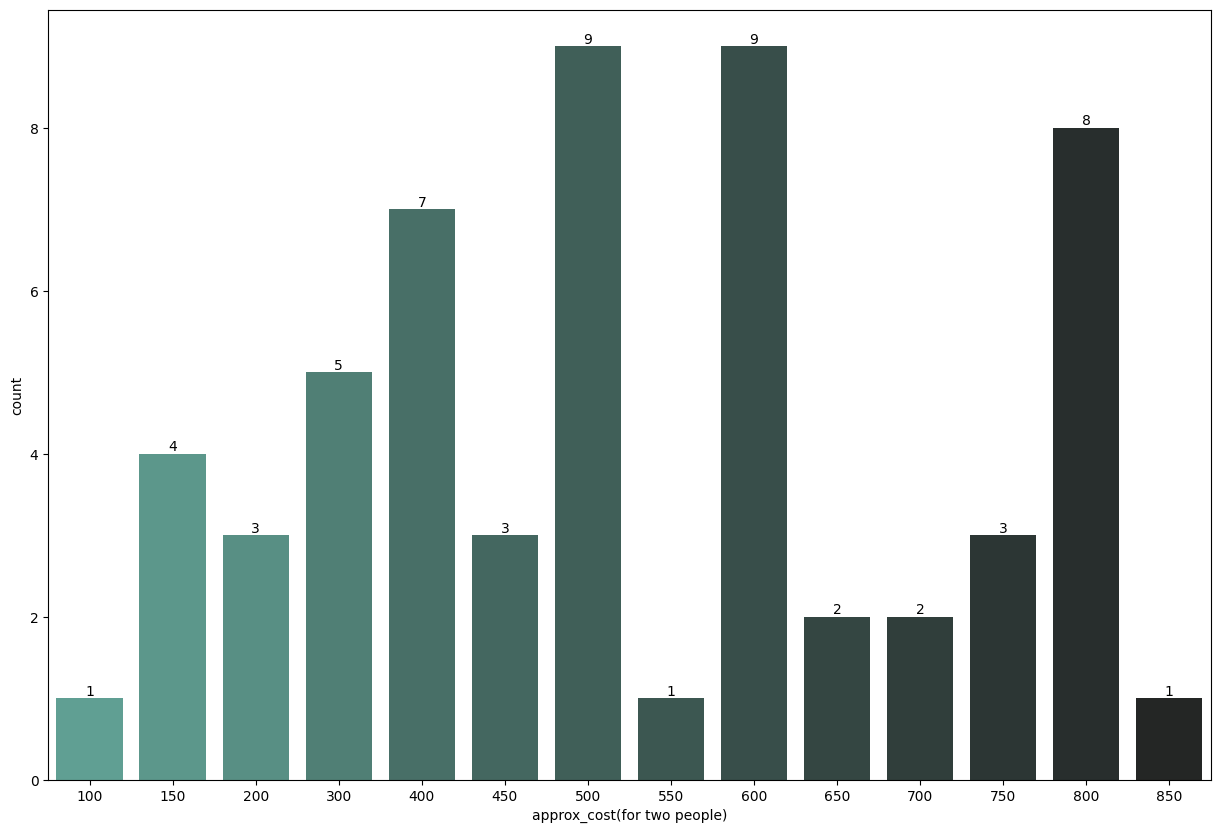

In [43]:
costs = df.loc[df["online_order"] == "Yes", "approx_cost(for two people)"]

fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.countplot(x=costs, palette="dark:#5A9_r", hue=costs, legend=False)

for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [44]:
print(f"Most couples, i.e. {costs.value_counts().max()} couples, spend an approximate amount of Rs.{' and Rs.'.join(map(str, costs.value_counts()[costs.value_counts() == 9].index.tolist()))} on each other.")

Most couples, i.e. 9 couples, spend an approximate amount of Rs.600 and Rs.500 on each other.


#### Answer 4:
Most couples, i.e. 9 couples, spend an approximate amount of ₹600 and ₹500 on each other.

### Q5. Which mode (online or offline) has received the maximum rating?

In [45]:
df.groupby("online_order")["rate"].mean().round(1)

online_order
No     3.6
Yes    3.9
Name: rate, dtype: float64

<Axes: title={'center': 'Online VS Offline Rating Comparison'}, xlabel='online_order', ylabel='rate'>

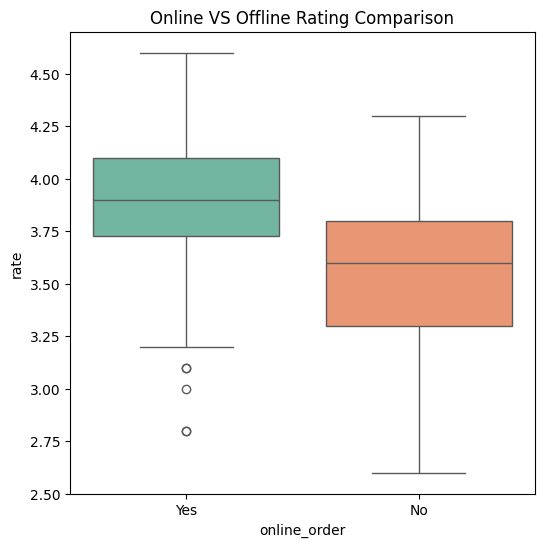

In [46]:
plt.figure(figsize=(6, 6))
plt.title("Online VS Offline Rating Comparison")
sns.boxplot(x="online_order", y="rate", data=df, palette="Set2", hue=df["online_order"], legend=False)

#### Answer 5:
Online orders have better ratings (3.9 out of 5 to be precise) than Offline orders (3.6 out of 5 to be precise).

### Q6. Which type of restaurant received more offline orders, so that Zomato can prefer customers with some good offers?

In [47]:
offline_res = df.groupby("listed_in(type)")["online_order"].value_counts().unstack()
offline_res

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,44,33
other,2,6


<Axes: xlabel='online_order', ylabel='listed_in(type)'>

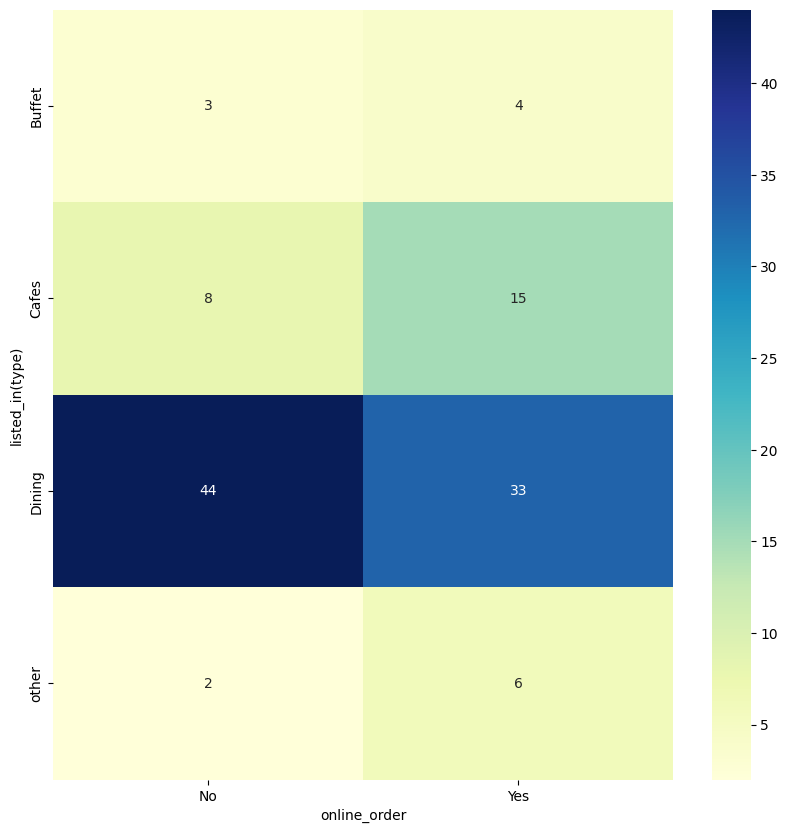

In [48]:
plt.figure(figsize=(10,10))

sns.heatmap(data=offline_res, annot=True, fmt="d", cmap="YlGnBu")

#### Answer 6:
Dining Restaurants receive maximum Offline orders (i.e. 44 orders)

### Compare: Actual Rating VS Adjusted Rating

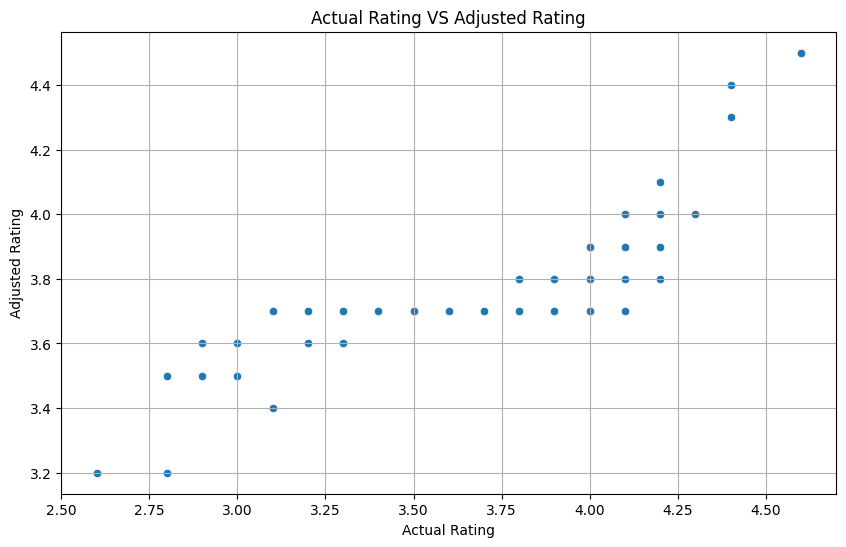

In [49]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x="rate", y="bayesian_average")

plt.title("Actual Rating VS Adjusted Rating")
plt.xlabel("Actual Rating")
plt.ylabel("Adjusted Rating")
plt.grid(True)
plt.show()

## Model Training

### Train-Test Split

Since the data is small, we are going to use 80:20 train-test dataset model. Here 80% of the data will be used to train the model, while 20% of data will be used to test the model (if it is predicting properly or not)

In [50]:
input_data = df2.drop(columns=["bayesian_average"])
output_data = df2["bayesian_average"]

In [51]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

### Model Creation, Training and Testing

I will create 2 models, one is Linear Regression and other is Random Forest Regressor

#### Model Creation

In [52]:
model1 = LinearRegression()
model2 = RandomForestRegressor(random_state=42)

#### Model Training

In [53]:
model1.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
model2.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Model Testing

Model Testing for Linear Regression Model

In [55]:
log_predict_LR = model1.predict(x_test)
LR_predict = np.exp(log_predict_LR)

Model Testing for Random Forest Regressor

In [56]:
log_predict_RFR = model2.predict(x_test)
RFR_predict = np.exp(log_predict_RFR)

#### Comparing Models

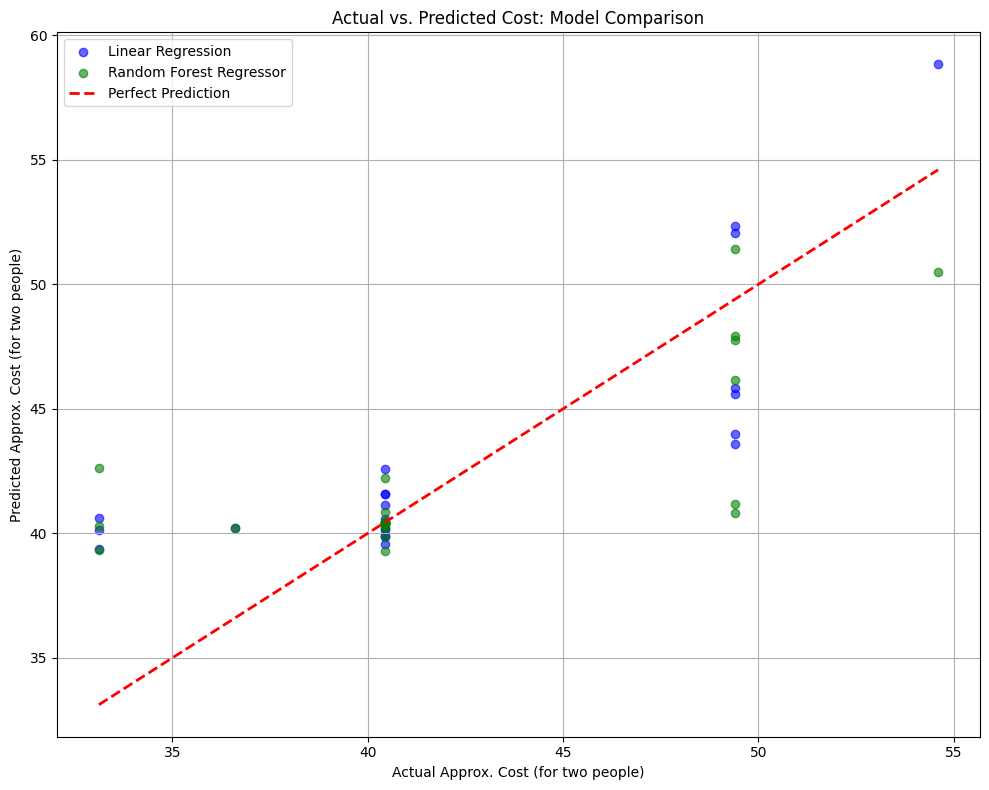

In [57]:
plt.figure(figsize=(10, 8))

plt.scatter(np.exp(y_test), LR_predict, alpha=0.6, color='blue', label=f'Linear Regression')
plt.scatter(np.exp(y_test), RFR_predict, alpha=0.6, color='green', label=f'Random Forest Regressor')

min_val = np.exp(y_test).min()
max_val = np.exp(y_test).max()
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

plt.xlabel("Actual Approx. Cost (for two people)")
plt.ylabel("Predicted Approx. Cost (for two people)")
plt.title("Actual vs. Predicted Cost: Model Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()

In [58]:
LR_mae = mean_absolute_error(np.exp(y_test), LR_predict)
LR_mse = mean_squared_error(np.exp(y_test), LR_predict)
LR_rmse = np.sqrt(LR_mse)
LR_r2 = r2_score(np.exp(y_test), LR_predict)

print("Mean Absolute Error (MAE) for Linear Regressing:", LR_mae)
print("Mean Squared Error (MSE) for Linear Regressing:", LR_mse)
print("Root Mean Squared Error (RMSE) for Linear Regressing:", LR_rmse)
print("R² Score for Linear Regressing:", LR_r2)

Mean Absolute Error (MAE) for Linear Regressing: 2.6366903988494106
Mean Squared Error (MSE) for Linear Regressing: 12.635215719560904
Root Mean Squared Error (RMSE) for Linear Regressing: 3.5546048612413874
R² Score for Linear Regressing: 0.6277412144882519


In [59]:
RFR_mae = mean_absolute_error(np.exp(y_test), RFR_predict)
RFR_mse = mean_squared_error(np.exp(y_test), RFR_predict)
RFR_rmse = np.sqrt(RFR_mse)
RFR_r2 = r2_score(np.exp(y_test), RFR_predict)

print("Mean Absolute Error (MAE) for Random Forest Regressor:", RFR_mae)
print("Mean Squared Error (MSE) for Random Forest Regressor:", RFR_mse)
print("Root Mean Squared Error (RMSE) for Random Forest Regressor:", RFR_rmse)
print("R² Score for Random Forest Regressor:", RFR_r2)

Mean Absolute Error (MAE) for Random Forest Regressor: 2.620548892218278
Mean Squared Error (MSE) for Random Forest Regressor: 16.341101214917863
Root Mean Squared Error (RMSE) for Random Forest Regressor: 4.042412796204498
R² Score for Random Forest Regressor: 0.518558398431422


#### Therefore, Linear Regression is better model than Random Forest Regressor
Linear Regression has a precision of 62%, while Random Forest Regressor has a precision of 52%